Run this notebook to observe all EDA

Trying to Predict popularity from all other data of dataset like Store_Ratio, Basket Ratio, Store Score

`NOTE`:<br>
* Big Brands spend a significant amount on popularizing a product
* Their efforts go in vain while establishing merchandise in hyperlocal market(process of targeting prospective customers in a highly specific, geographically restricted area, sometimes just a few blocks or streets, often with intention of targeting people conducting "near me" searches on their mobile devic)
* Based on different geographical conditions same attributes can communicate a piece of much different information about customer

`So undestanding these insights are a must for any brand owner`

In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/sample_submission.csv
/kaggle/input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Train.csv
/kaggle/input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Test.csv


In [76]:
import seaborn as sns
from matplotlib import pylab
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,log_loss


import warnings
warnings.filterwarnings('ignore')

In [77]:
train_df = pd.read_csv('../input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Train.csv')
test_df = pd.read_csv('../input/machinehack-ml-merchandise-popularity-prediction/MPP_Dataset/Test.csv')

In [78]:
# Make a copy of the dataset
data = train_df

In [79]:
train_df.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


* `target`: popularity

In [80]:
test_df.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [81]:
# Check the shape of train dataset
train_df.shape

(18208, 12)

In [82]:
# Check the shape of test dataset
test_df.shape

(12140, 11)

In [83]:
# Check the columns in the train dataset
train_df.columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time', 'popularity'],
      dtype='object')

In [84]:
# Check which columns are having categorical, numerical or boolean values of train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


* `object` - String values
* `float64` - Numerical values
* `int64` - Numerical values



`Observation`<br>
There are no String values so there are no categorical data

In [85]:
# Check which columns are having categorical, numerical or boolean values of test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  12140 non-null  float64
 6   Score_1         12140 non-null  float64
 7   Score_2         12140 non-null  float64
 8   Score_3         12140 non-null  float64
 9   Score_4         12140 non-null  float64
 10  time            12140 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.0 MB


* `object` - String values
* `float64` - Numerical values
* `int64` - Numerical values



`Observation`<br>
There are no String values so there are no categorical data

In [86]:
# For more information on the train dataset like total count in all columns
# min, max values and more information of the respective columns 

train_df.describe()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
count,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,1.820800e+04,18208.000000
mean,0.544283,0.483585,5.155536,-12.198086,0.648506,0.477702,0.322109,0.164888,0.421440,115.305776,2.180101e+05,3.850231
std,0.202709,0.302010,3.535068,8.370566,0.477450,0.380634,0.413493,0.136531,0.271922,31.478303,9.648289e+04,0.544226
min,0.000000,0.000216,0.000000,-47.576000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,3.184400e+04,0.000000
25%,0.411000,0.200000,2.000000,-16.496250,0.000000,0.086175,0.000001,0.095300,0.184750,90.974250,1.696202e+05,4.000000
50%,0.573000,0.517000,5.000000,-9.166500,1.000000,0.430000,0.002245,0.112000,0.393000,114.022500,2.046460e+05,4.000000
75%,0.699000,0.742000,8.000000,-5.943750,1.000000,0.895000,0.859000,0.176000,0.640000,134.997000,2.471562e+05,4.000000
max,0.998000,1.000000,11.000000,-0.079000,1.000000,0.996000,1.000000,0.991000,0.999000,219.701000,3.908467e+06,5.000000


In [87]:
# For more information on the train dataset like the total count in all the columns
# min, max values and more information of the respective columns  

test_df.describe()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
count,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,12140.000000,1.214000e+04
mean,0.543776,0.488879,5.121417,-12.062847,0.642916,0.474675,0.321641,0.165942,0.420485,115.748041,2.154031e+05
std,0.200109,0.301217,3.528765,8.300385,0.479160,0.377582,0.414438,0.139109,0.270508,31.519999,8.231108e+04
min,0.000000,0.000000,0.000000,-46.847000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.406700e+04
25%,0.414750,0.213000,2.000000,-16.066000,0.000000,0.087775,0.000001,0.095900,0.190000,90.908750,1.700000e+05
50%,0.570000,0.521000,5.000000,-9.046500,1.000000,0.430500,0.002050,0.112000,0.392000,114.618500,2.043415e+05
75%,0.696000,0.745000,8.000000,-5.891750,1.000000,0.882000,0.861000,0.173250,0.633000,135.829250,2.445222e+05
max,0.978000,1.000000,11.000000,0.662000,1.000000,0.996000,1.000000,0.994000,1.000000,219.701000,1.782178e+06


# Get total number of samples in the dataset using the len() function

In [88]:
# check the lenght of test and train dataset
print(f'train data length: {train_df.shape[0]}')
print(f'test data length: {test_df.shape[0]}')

train data length: 18208
test data length: 12140


# Counting the total number of missing values



In [89]:
# Check for missing values in all the columnns of the train dataset
train_df.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

In [90]:
# Check for missing values in all the columnns of the test dataset
test_df.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
dtype: int64

* There is no missing values in this dataset

# Get unique values

In [91]:
# get unique values in train dataset
train_df.nunique()

Store_Ratio        1053
Basket_Ratio       1993
Category_1           12
Store_Score       10758
Category_2            2
Store_Presence     2832
Score_1            3668
Score_2            1385
Score_3            1591
Score_4           12943
time              12755
popularity            5
dtype: int64

In [92]:
for i in train_df.columns:
    print(i,':',len(train_df[i].unique()))

Store_Ratio : 1053
Basket_Ratio : 1993
Category_1 : 12
Store_Score : 10758
Category_2 : 2
Store_Presence : 2832
Score_1 : 3668
Score_2 : 1385
Score_3 : 1591
Score_4 : 12943
time : 12755
popularity : 5


In [93]:
# get unique values in test dataset
test_df.nunique()

Store_Ratio       1010
Basket_Ratio      1811
Category_1          12
Store_Score       8300
Category_2           2
Store_Presence    2507
Score_1           3064
Score_2           1275
Score_3           1491
Score_4           9463
time              9301
dtype: int64

In [94]:
for i in test_df.columns:
    print(i,':',len(test_df[i].unique()))

Store_Ratio : 1010
Basket_Ratio : 1811
Category_1 : 12
Store_Score : 8300
Category_2 : 2
Store_Presence : 2507
Score_1 : 3064
Score_2 : 1275
Score_3 : 1491
Score_4 : 9463
time : 9301


# EDA
# CORRELATION MATRIX What? |Why? | How?
Its is a table showing correlation coefficients between variables


Three broad reasons for computing a correlation matrix:

* `To summarize a large amount of data where goal is to see patterns`. In our case observable pattern is that all variables highly correlate with each other
* `To input into other analyses` Say: people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise
* `As a diagnostic when checking other analyses` Say: with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable


In [95]:
# correlation (pandas)

corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
Store_Ratio,1.00,0.47,0.04,0.60,-0.10,-0.47,-0.45,-0.04,0.62,0.12,-0.06,0.23
Basket_Ratio,0.47,1.00,0.05,0.83,-0.11,-0.82,-0.61,0.28,0.53,0.25,0.10,0.20
Category_1,0.04,0.05,1.00,0.04,-0.14,-0.05,-0.03,0.02,0.04,0.00,-0.01,0.00
Store_Score,0.60,0.83,0.04,1.00,-0.09,-0.72,-0.73,0.15,0.52,0.26,0.08,0.20
Category_2,-0.10,-0.11,-0.14,-0.09,1.00,0.10,0.02,-0.04,-0.04,-0.05,-0.01,-0.03
Store_Presence,-0.47,-0.82,-0.05,-0.72,0.10,1.00,0.57,-0.19,-0.43,-0.22,-0.07,-0.20
Score_1,-0.45,-0.61,-0.03,-0.73,0.02,0.57,1.00,-0.10,-0.47,-0.20,-0.11,-0.16
Score_2,-0.04,0.28,0.02,0.15,-0.04,-0.19,-0.10,1.00,0.03,0.02,-0.00,0.00
Score_3,0.62,0.53,0.04,0.52,-0.04,-0.43,-0.47,0.03,1.00,0.18,0.01,0.18
Score_4,0.12,0.25,0.00,0.26,-0.05,-0.22,-0.20,0.02,0.18,1.00,0.03,0.04


`Observation:`
* Store_Ratio is strongly correlated with Basket_Ratio,Store_Score,score3,store presence,score1
* Basket_Ratio is correlatd to store score, store presence, score1 score3.
* Category_1 is correlated with category2
* Store_Presence is correlated with score1,score2,score3,popularity
* Score_1 is correlated with score3,score4,time,popularity

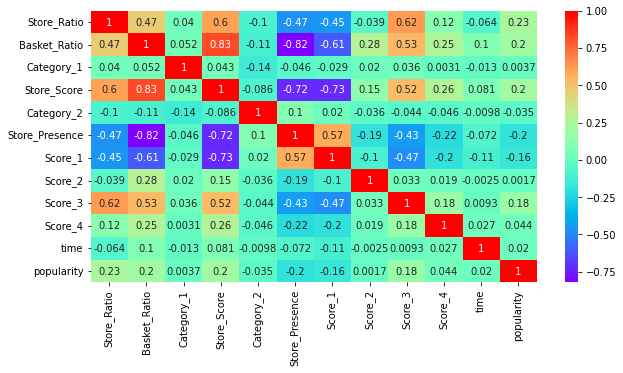

In [96]:
#perfoming correlation matrix Using seaborn
plt.figure(figsize=(10,5))
sns.heatmap(corr,cmap='rainbow',annot=True)
plt.show()

# SCATTER PLOT
Uses Cartesian coordinates to display values for typically two variables for a set of data

* Data are displayed as a collection of points, each having value of one variable determining position on horizontal axis and value of other variable determining position on vertical axis


`Scatter plot's are used to observe and show relationships between two numeric variables`



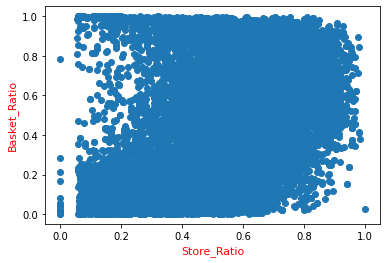

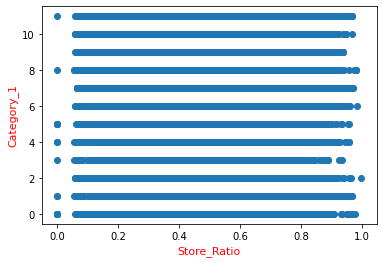

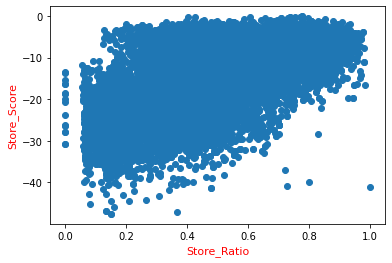

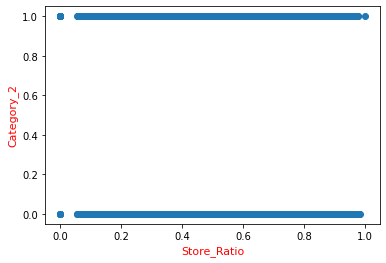

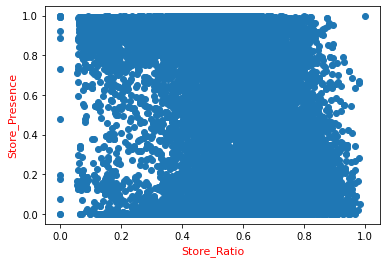

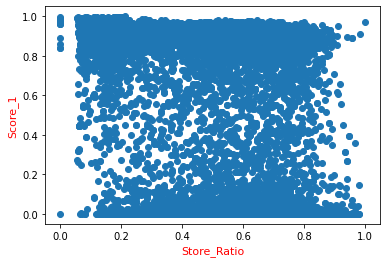

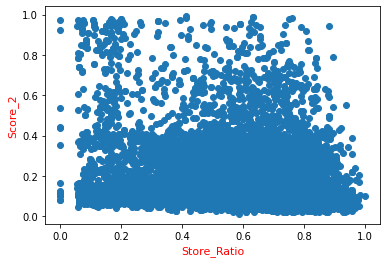

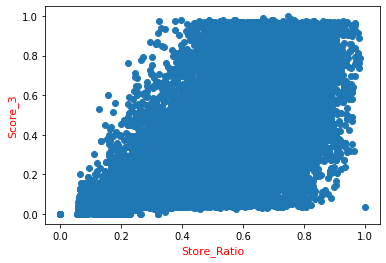

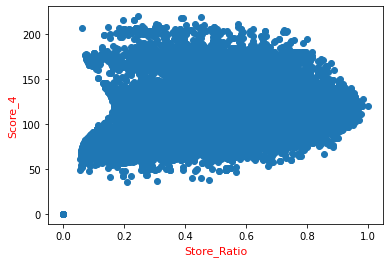

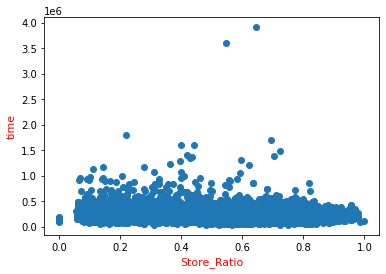

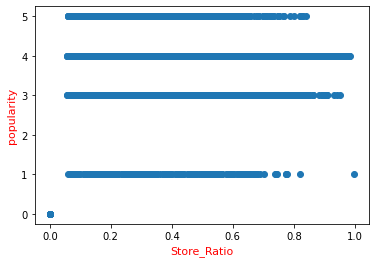

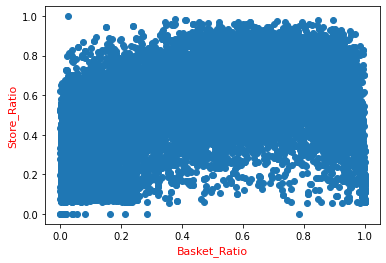

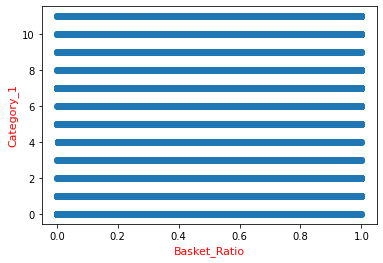

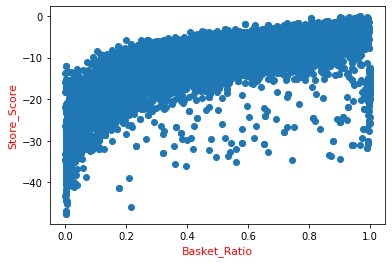

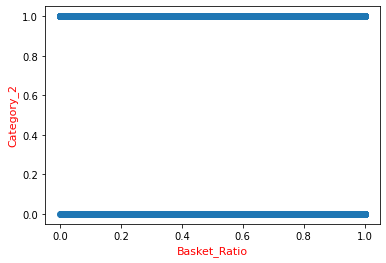

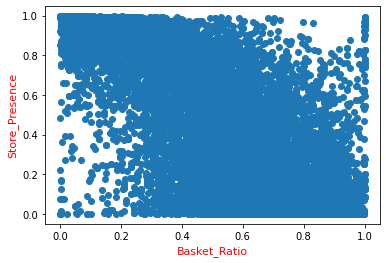

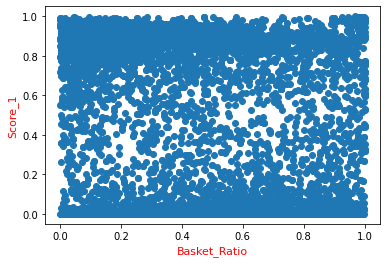

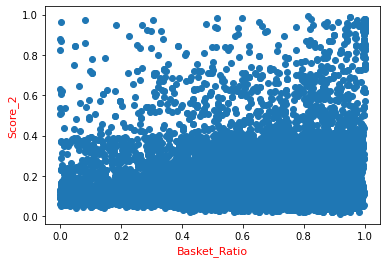

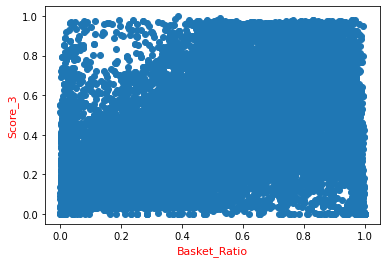

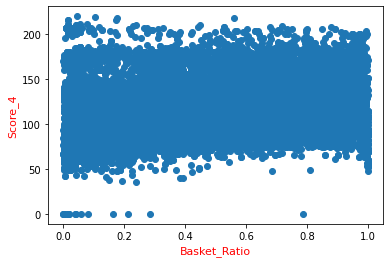

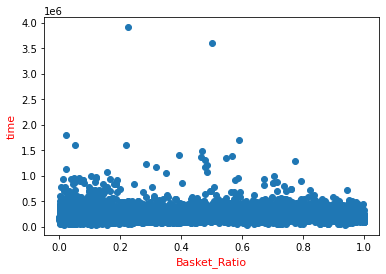

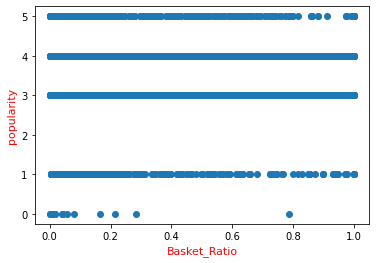

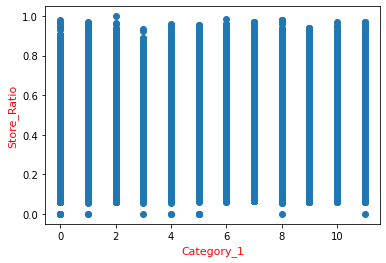

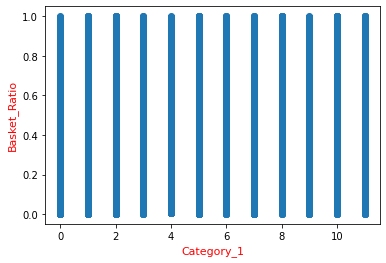

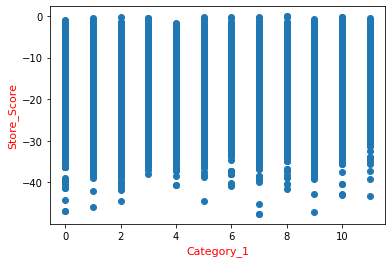

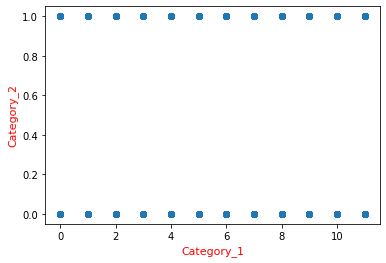

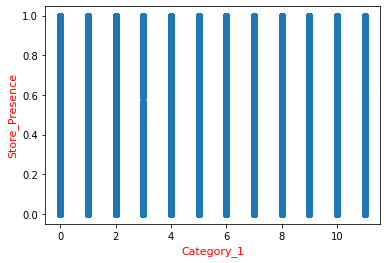

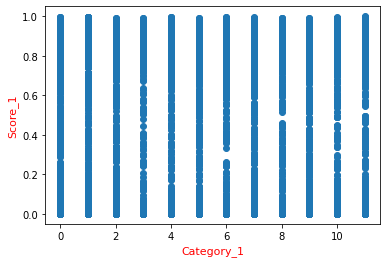

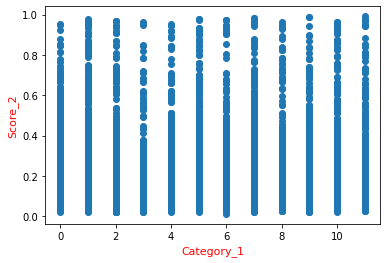

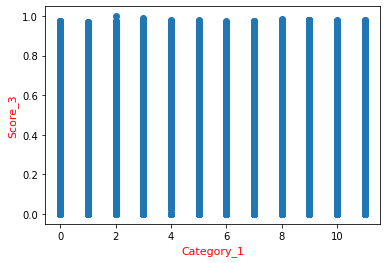

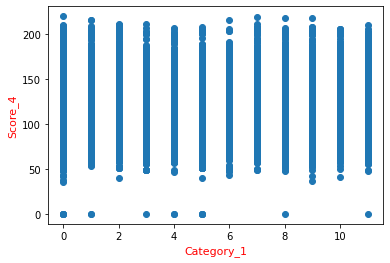

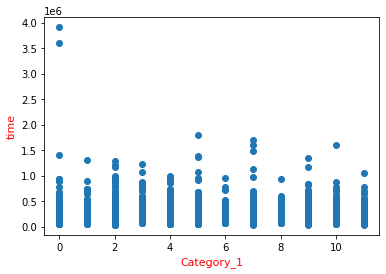

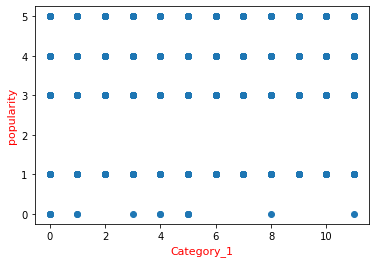

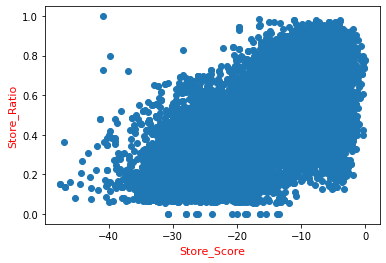

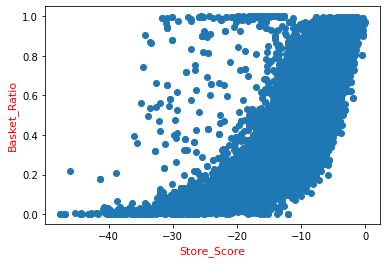

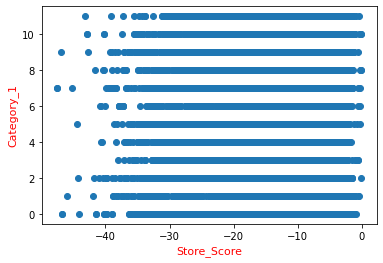

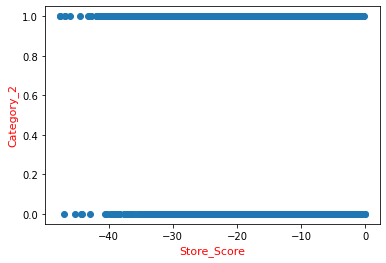

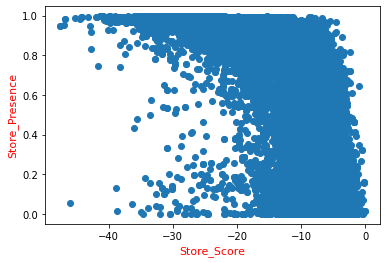

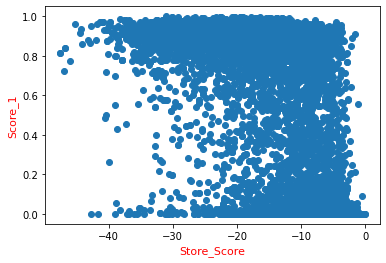

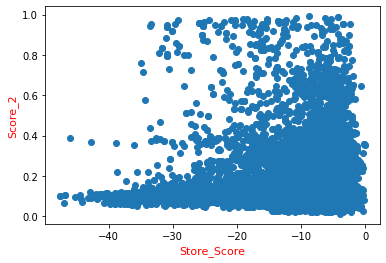

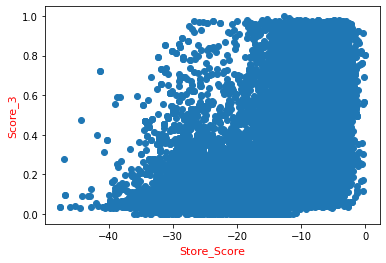

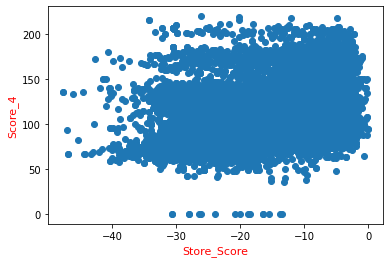

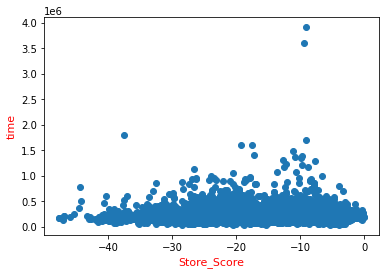

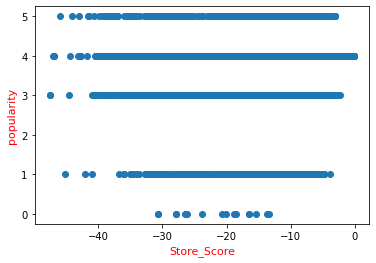

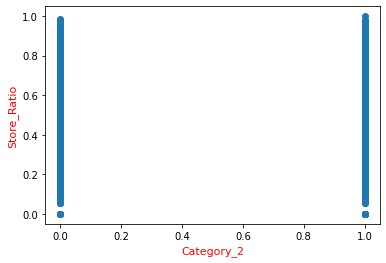

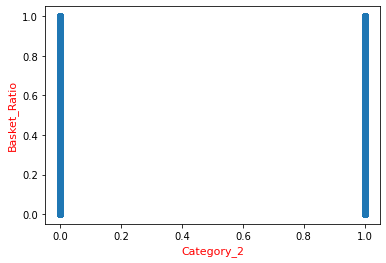

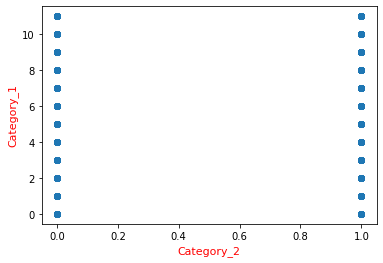

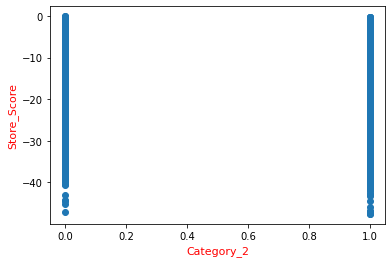

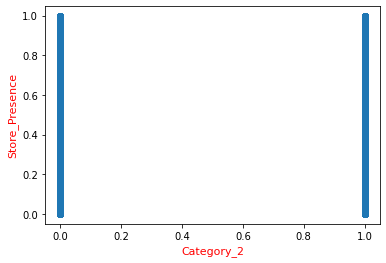

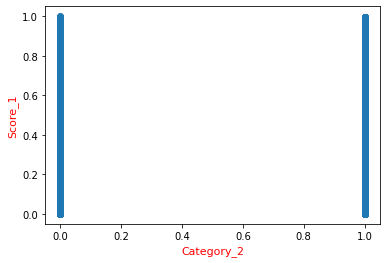

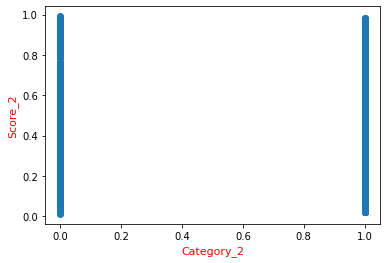

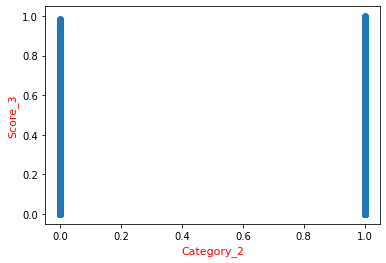

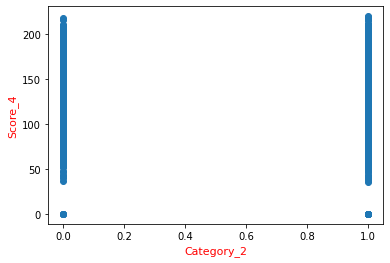

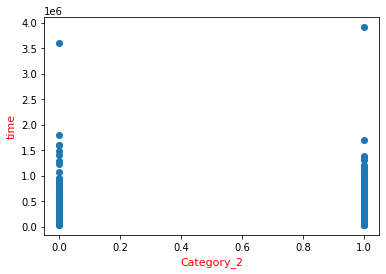

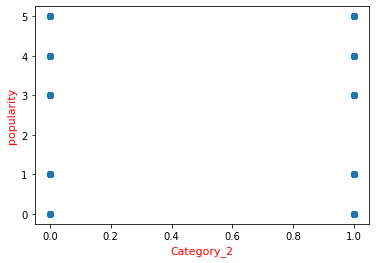

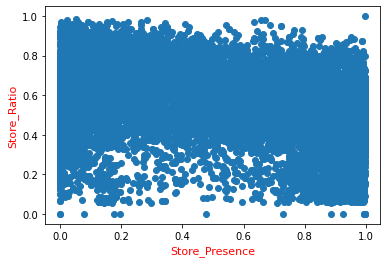

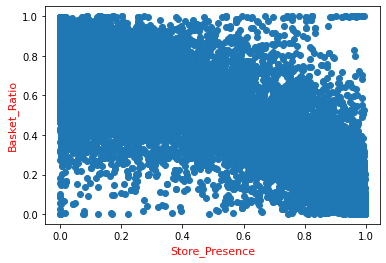

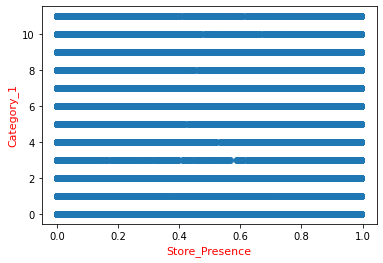

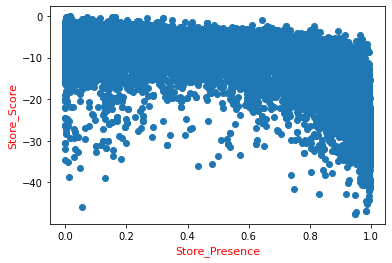

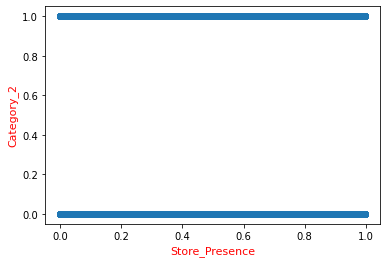

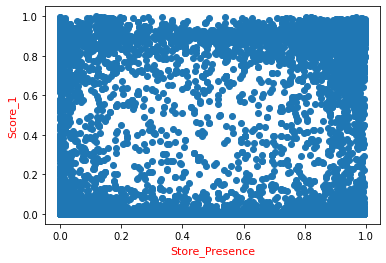

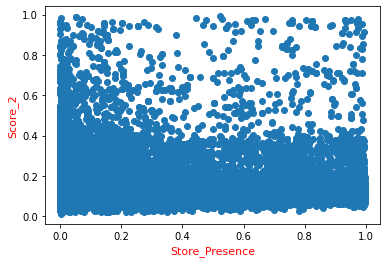

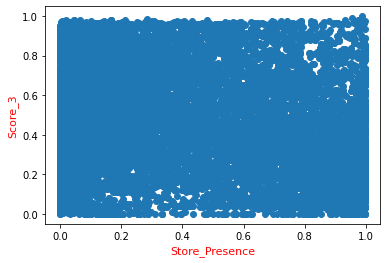

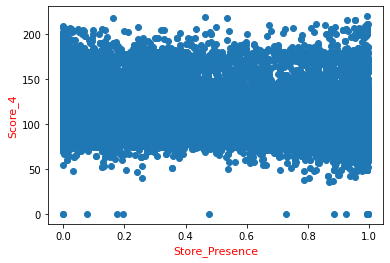

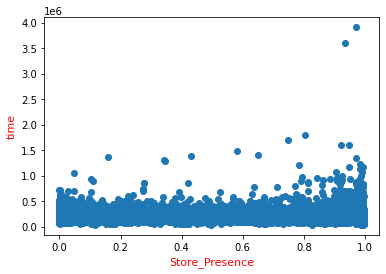

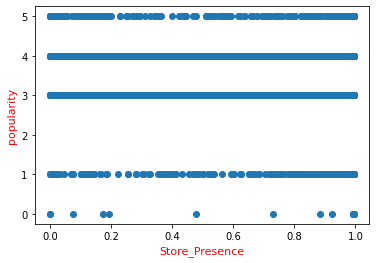

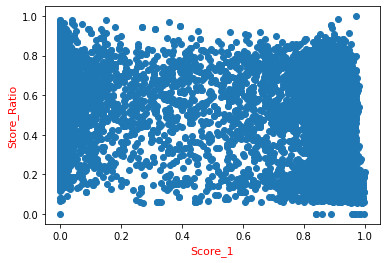

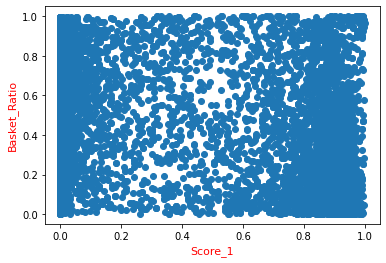

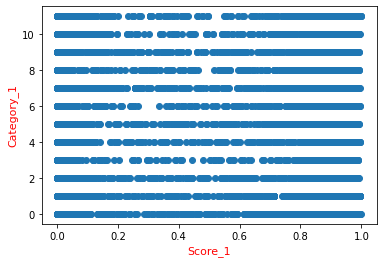

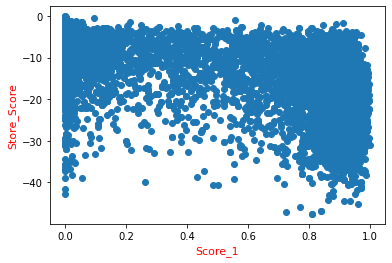

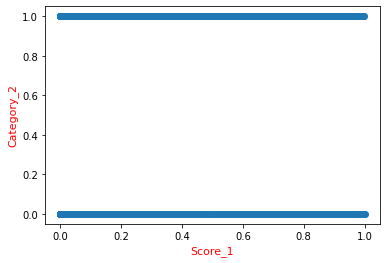

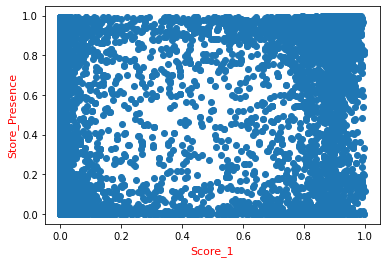

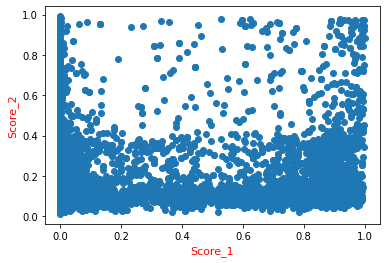

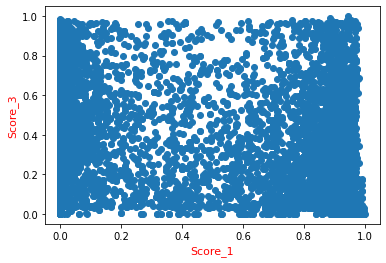

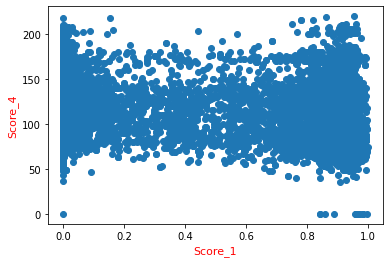

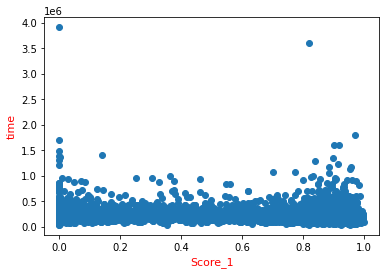

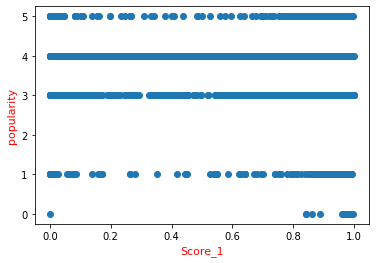

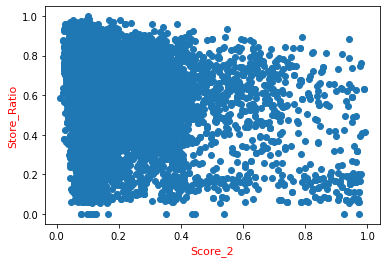

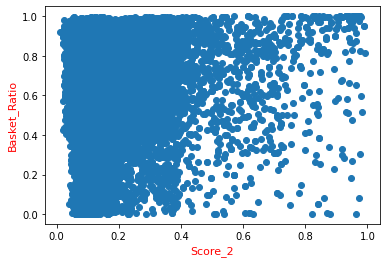

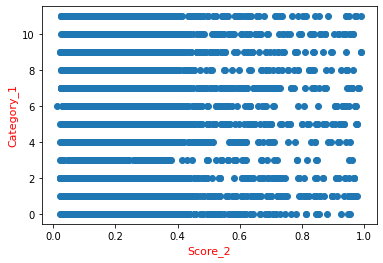

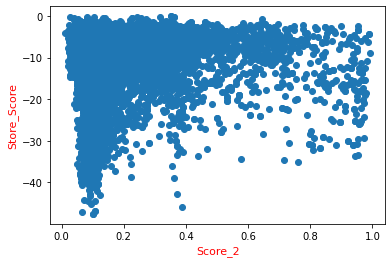

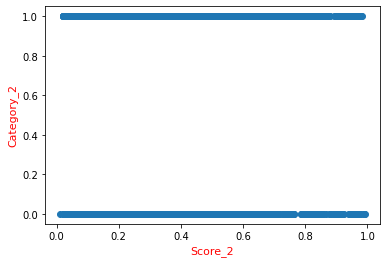

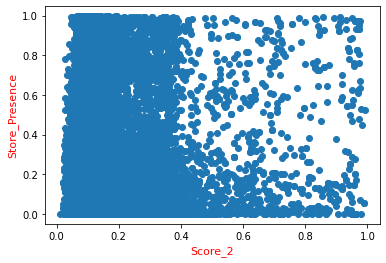

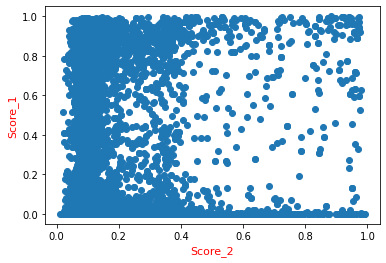

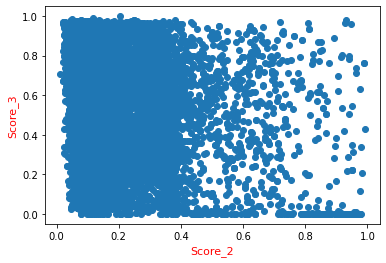

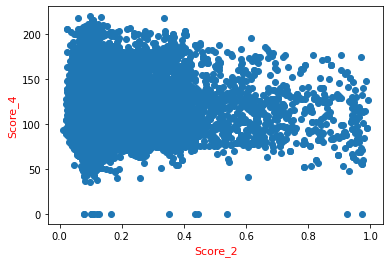

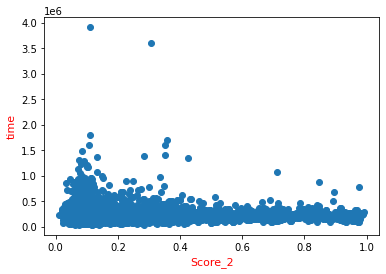

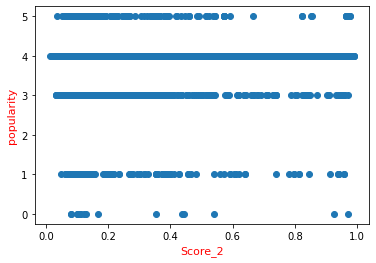

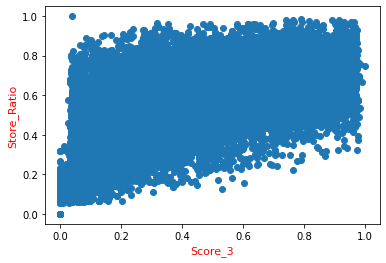

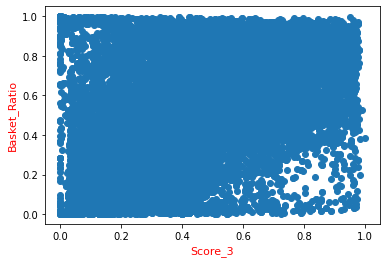

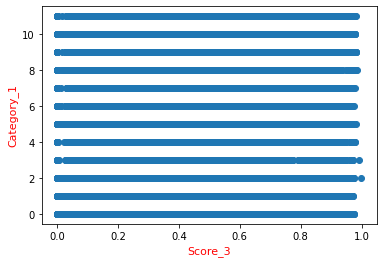

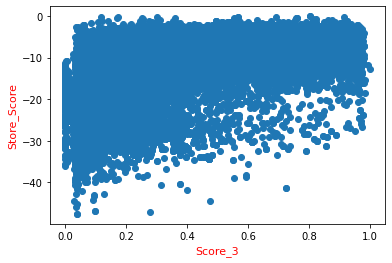

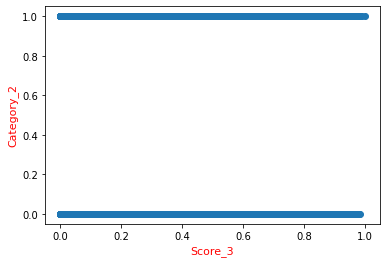

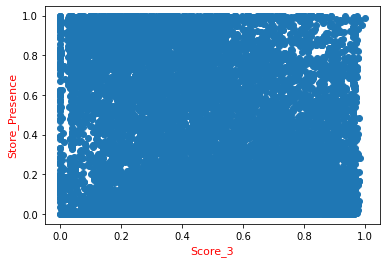

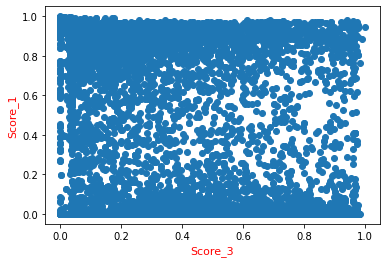

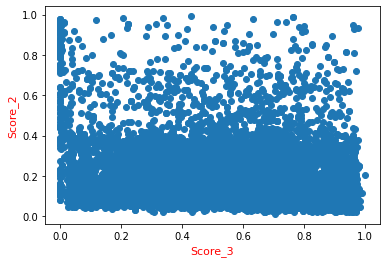

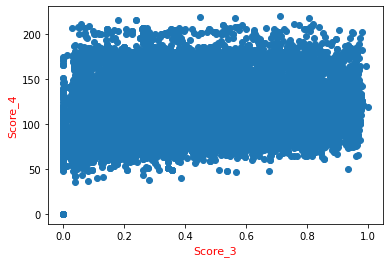

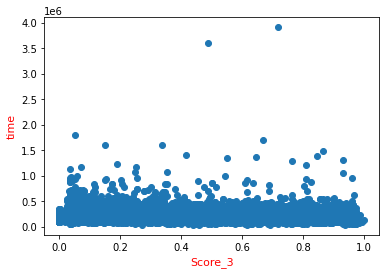

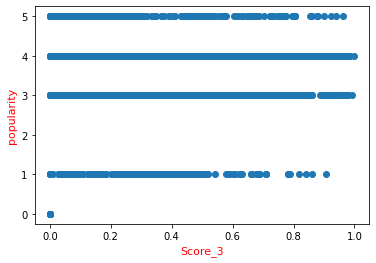

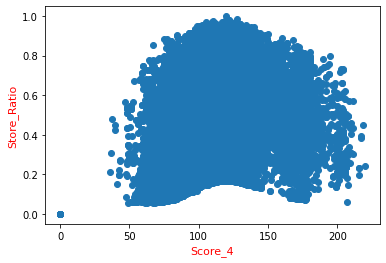

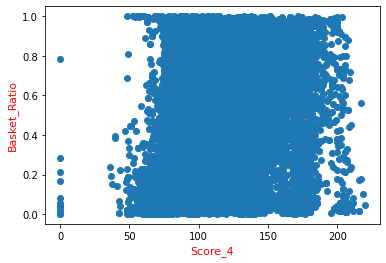

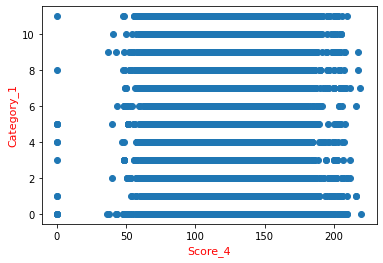

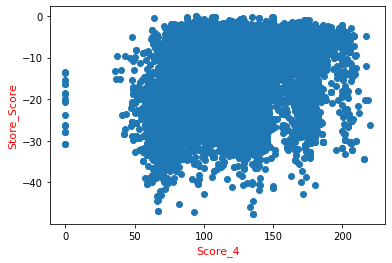

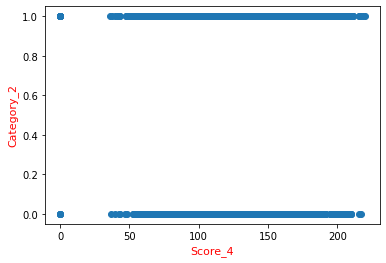

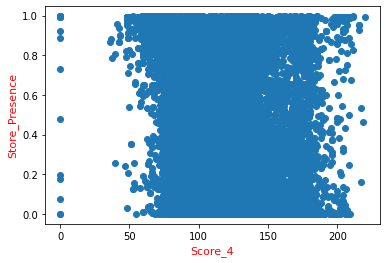

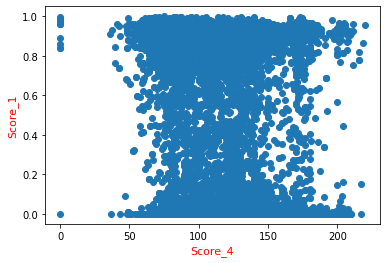

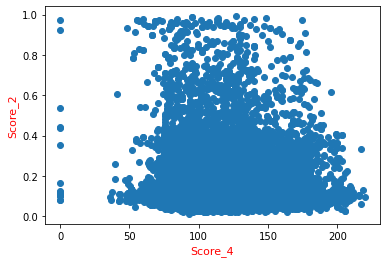

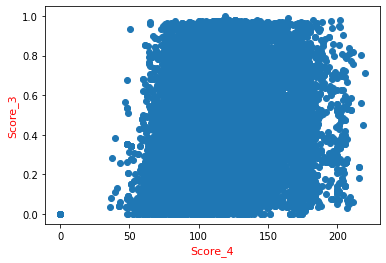

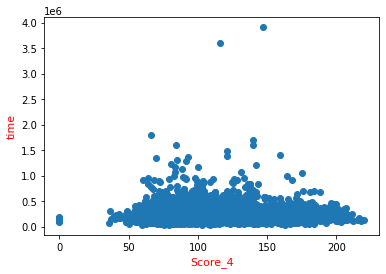

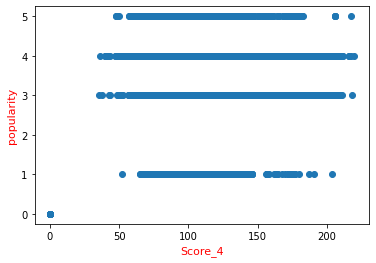

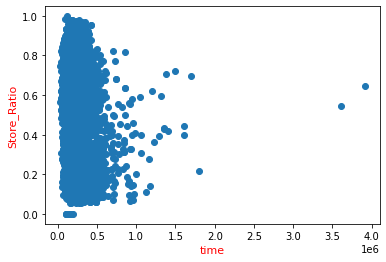

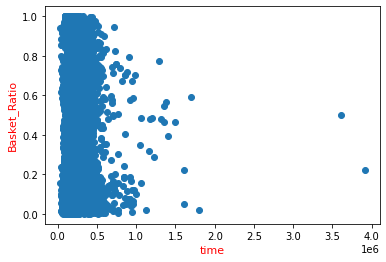

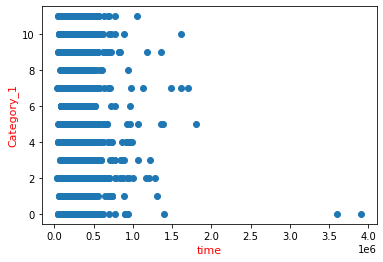

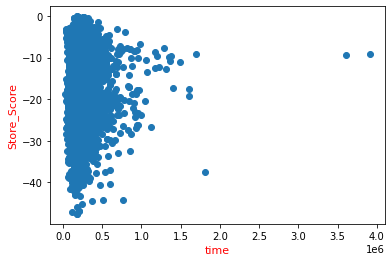

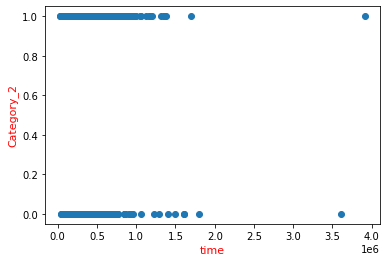

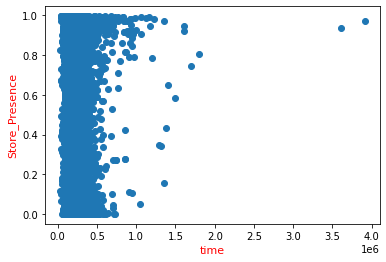

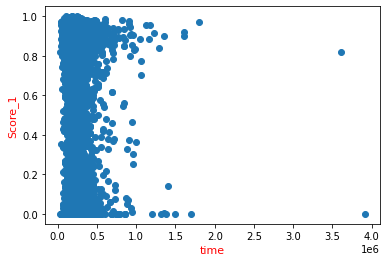

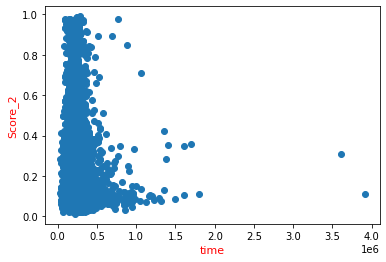

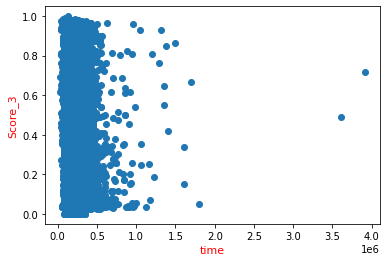

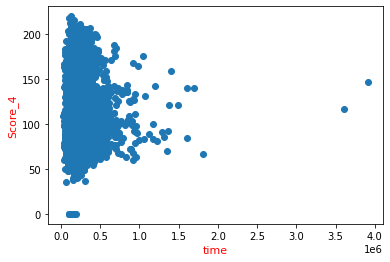

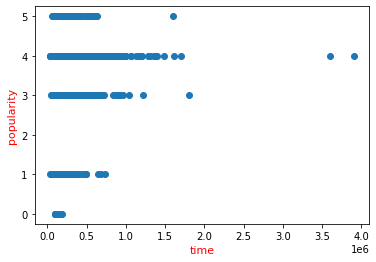

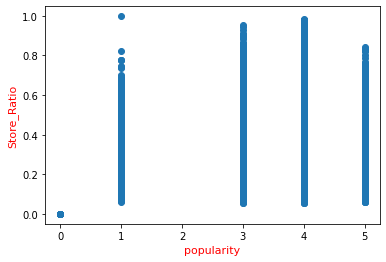

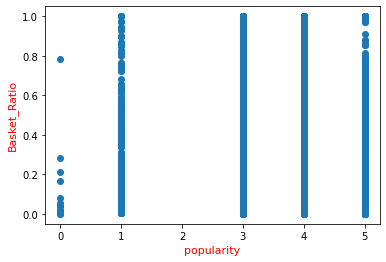

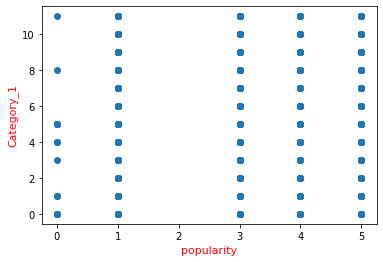

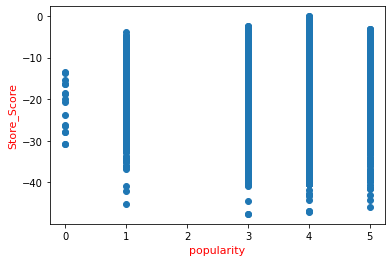

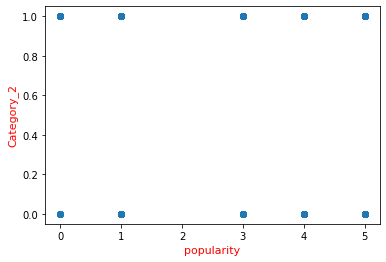

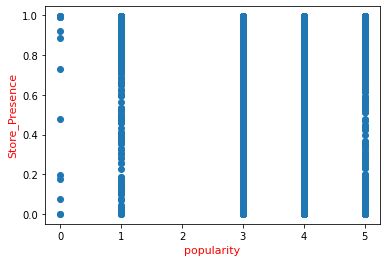

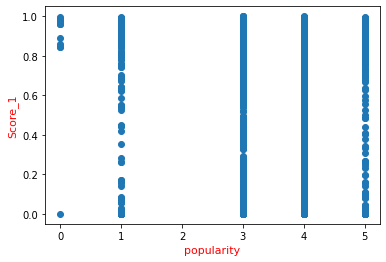

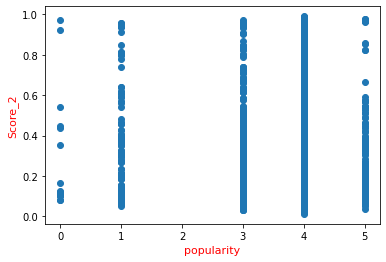

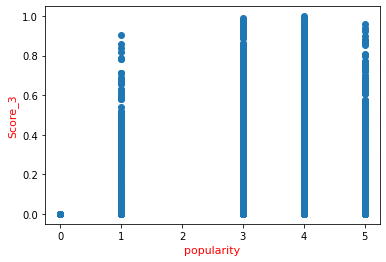

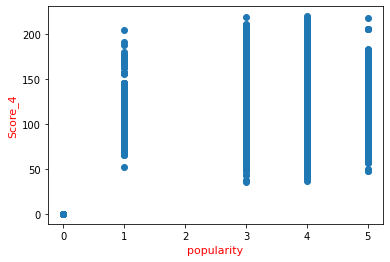

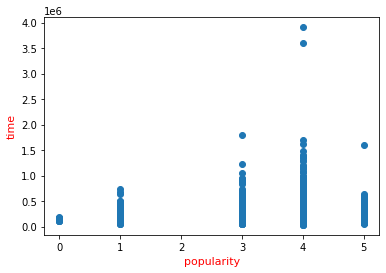

In [97]:
# perform scatterplot 
train_df_columns = train_df.columns
# Loop through the different columns
def scat_plot(col1,col2):
    plt.scatter(train_df[col1],train_df[col2])
    plt.xlabel(col1,fontsize=11,color='r')
    plt.ylabel(col2,fontsize=11,color='r')
    plt.show()
    
# Loop through numerical data list and use function to scatter plot between two columns 
for col_i in train_df_columns:
    for col_j in train_df_columns:
        if col_i != col_j:
            scat_plot(col_i,col_j)

`Observations`
* As value of store presence increases value of basket ratio decreases
* As value of store scrore increases value of basket ratio increases
* Increase in value of store ratio results in the increase of basket ratio's value

# Histogram Why?
* Gives an approximate representation of distribution of numerical data

To construct a histogram steps:
1. "bin" (or "bucket") range of values—that divides entire range of values into a series of intervals
2. count how many values fall into each interval

Words used to describe patterns in a histogram are: `"symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal"`

In [98]:
from tqdm import tqdm

  0%|          | 0/12 [00:00<?, ?it/s]

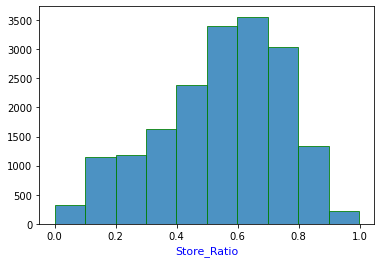

  8%|▊         | 1/12 [00:00<00:02,  4.69it/s]

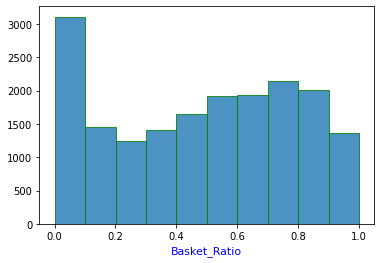

 17%|█▋        | 2/12 [00:00<00:02,  4.74it/s]

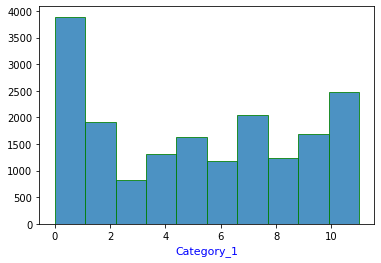

 25%|██▌       | 3/12 [00:00<00:01,  4.66it/s]

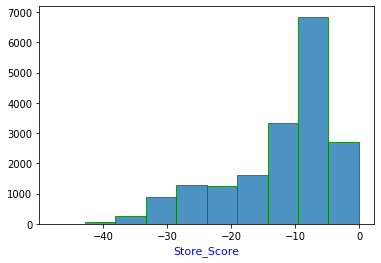

 33%|███▎      | 4/12 [00:00<00:01,  4.75it/s]

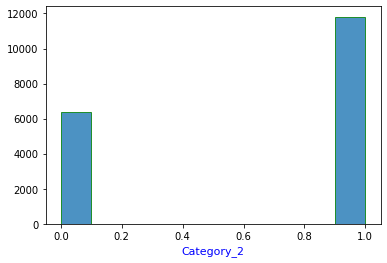

 42%|████▏     | 5/12 [00:01<00:01,  4.80it/s]

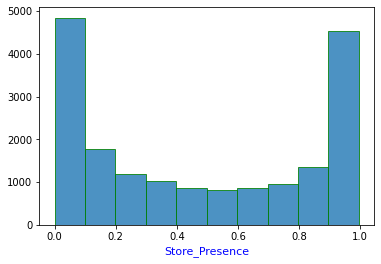

 50%|█████     | 6/12 [00:01<00:01,  4.85it/s]

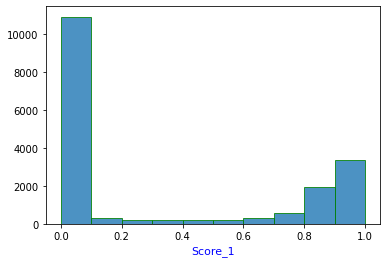

 58%|█████▊    | 7/12 [00:01<00:01,  4.90it/s]

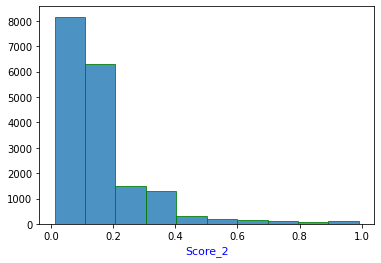

 67%|██████▋   | 8/12 [00:01<00:00,  4.80it/s]

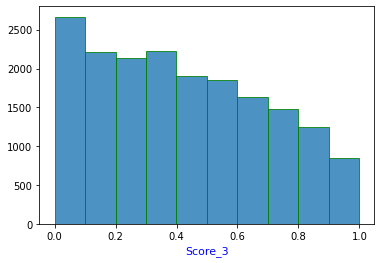

 75%|███████▌  | 9/12 [00:01<00:00,  4.87it/s]

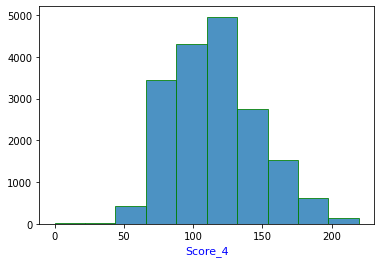

 83%|████████▎ | 10/12 [00:02<00:00,  4.95it/s]

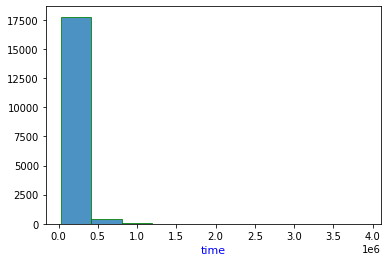

 92%|█████████▏| 11/12 [00:02<00:00,  4.79it/s]

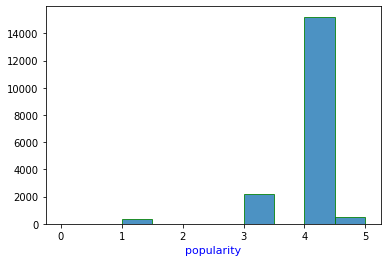

100%|██████████| 12/12 [00:02<00:00,  4.81it/s]


In [99]:
def hist_p(col1): 
    #bins=np.arange(min(train_data[col1]),max(train_data[col1]) + 1,1) 
    plt.hist(train_df[col1],alpha=0.8,edgecolor='g')
    plt.xlabel(col1,fontsize=11,color='b')
    plt.show()

for col_i in tqdm(train_df_columns): 
    hist_p(col_i)

`Observation:`

* Data distribution of store presence is bimodal
* Score_2, score 1, score3 and time data distribution is skewed left
* Store score and popularity data distribution is skewed right
* distribution of basket ratio, carwgort 1 is multimodal
* distribution of store eatio is bimodal and skewed

In [101]:
# creating a dataframe of just numerical values from train_dataset
train_df_for_vif = train_df.drop(['popularity'],axis=1)

# target values from train_dataset
target = train_df['popularity']

# numerical values column names
train_df_columns = train_df_columns[:-1]
train_df_columns

Index(['Store_Ratio', 'Basket_Ratio', 'Category_1', 'Store_Score',
       'Category_2', 'Store_Presence', 'Score_1', 'Score_2', 'Score_3',
       'Score_4', 'time'],
      dtype='object')

In [102]:
(train_df_for_vif.isnull().sum()/train_df_for_vif.shape[0])*100

Store_Ratio       0.0
Basket_Ratio      0.0
Category_1        0.0
Store_Score       0.0
Category_2        0.0
Store_Presence    0.0
Score_1           0.0
Score_2           0.0
Score_3           0.0
Score_4           0.0
time              0.0
dtype: float64

In [103]:
# droping rows with from new dataframe empty cells
train_df_for_vif = train_df_for_vif.dropna()

# Variance inflation factor (VIF) Why?
* It quantifies extent of correlation between one predictor and other predictors in a model
* It is used for diagnosing collinearity/multicollinearity
* Higher values signify that it is difficult or impossible to assess accurately contribution of predictors to a model

In [ ]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [105]:
# loop for calculating VIF for each feature.
for count in range(0,len(train_df_for_vif.columns)):
    # taking one column as target variable
    one_col = train_df_for_vif.loc[:,train_df_for_vif.columns==train_df_columns[count]]
    # taking all other remaining columns as fetaure variable
    all_other_col = train_df_for_vif.loc[:,train_df_for_vif.columns!=train_df_columns[count]]
    # fiting the OLS model on y and x
    model = sm.OLS(one_col,all_other_col)
    model = model.fit()
    # geting the r^2 value of results
    r_sqrd = model.rsquared
    # calculating vif value
    var_infla_factor = round(1/(1-r_sqrd),3)
    print(f': R Square value of [-{train_df_columns[count]}-] column is {round(r_sqrd,3)} keeping all other columns as features')
    print(f': Variance inflation Factor of [-{train_df_columns[count]}-] column is {var_infla_factor}.\n')

: R Square value of [-Store_Ratio-] column is 0.915 keeping all other columns as features
: Variance inflation Factor of [-Store_Ratio-] column is 11.741.

: R Square value of [-Basket_Ratio-] column is 0.918 keeping all other columns as features
: Variance inflation Factor of [-Basket_Ratio-] column is 12.133.

: R Square value of [-Category_1-] column is 0.679 keeping all other columns as features
: Variance inflation Factor of [-Category_1-] column is 3.111.

: R Square value of [-Store_Score-] column is 0.899 keeping all other columns as features
: Variance inflation Factor of [-Store_Score-] column is 9.87.

: R Square value of [-Category_2-] column is 0.646 keeping all other columns as features
: Variance inflation Factor of [-Category_2-] column is 2.826.

: R Square value of [-Store_Presence-] column is 0.851 keeping all other columns as features
: Variance inflation Factor of [-Store_Presence-] column is 6.693.

: R Square value of [-Score_1-] column is 0.721 keeping all other

`Observations:`

there is colinearity/multicolinearity between variables as the VIF value is almost upto 2.5

Store_Ratio, Basket_Ratio, Category_1, Store_Score, Category_2, Store_Presence, Score_1, Score_2, Score_3, Score_4, time they all have colinearity with all the variables

# Box Plot
A boxplot is a standardized way of displaying the dataset based on a five-number summary:

1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

3. Median (Q2 or 50th percentile): the middle value of the dataset.

4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

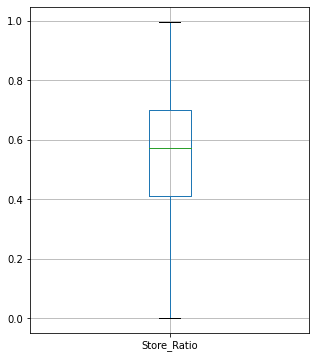

In [106]:
# Perform a box plot on Store_Ratio
train_df.boxplot(column='Store_Ratio',figsize=(5,6))
plt.show()

`Store_Ratio`

1. 25% of  store ratio have value between range 0 to 0.4
2. 25% of store ratio have value between range 0.4 to 0.6
3. 25% of store ratio have value between range 0.6 to 0.7
4. 25% of store ratio have value between range 0.7 to 1

Mean store ratio is around 0.58

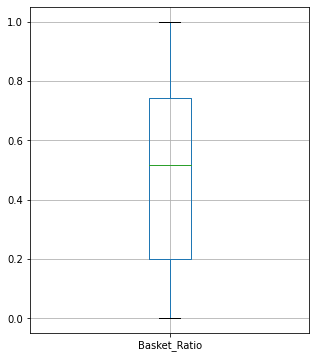

In [107]:
# Perform a box plot on Basket_Ratio
train_df.boxplot(column='Basket_Ratio',figsize=(5,6))
plt.show()

`Basket_Ratio`

1. 25% of  basket ratio have value between range 0 to 0.2
2. 25% of basket ratio have value between range 0.4 to 0.52
3. 25% of basket ratio have value between range 0.52 to 0.78
4. 25% of basket ratio have value between range 0.78 to 1

Mean basket ratio is around 0.52

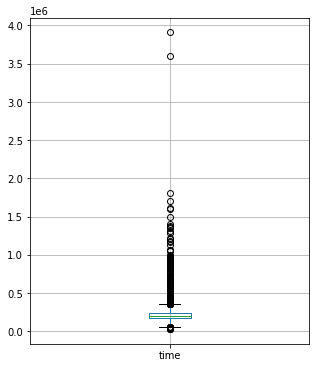

In [108]:
# Perform a box plot on time
train_df.boxplot(column='time',figsize=(5,6))
plt.show()

`time`

1. 25% of  time have value between range 0 to 0.2
2. 25% of time have value between range 0.2 to 0.25
3. 25% of time have value between range 0.25 to 0.3
4. 25% of time have value between range 0.3 to 0.4

Mean time is around 0.25

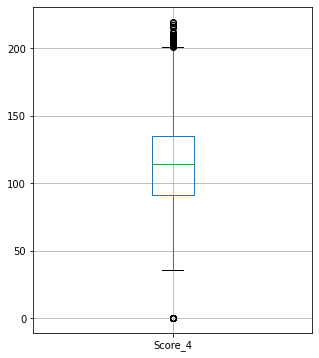

In [109]:
# Perform a box plot on Score_4 
train_df.boxplot(column='Score_4',figsize=(5,6))
plt.show()

`Score_4`

1. 25% of  score 4 have value between range 40 to 90
2. 25% of score 4 have value between range 90 to 125
3. 25% of score 4 have value between range 125 to 140
4. 25% of score 4 have value between range 140 to 200

Mean Score_4 is around less then 125

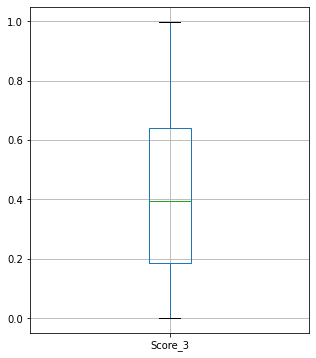

In [110]:
# Perform a box plot on Score_3
train_df.boxplot(column='Score_3',figsize=(5,6))
plt.show()

`Score_3`

1. 25% of  score3 have value between range 0 to 0.2
2. 25% of score3 have value between range 0.2 to 0.4
3. 25% of score3 have value between range 0.4 to 0.62
4. 25% of score3 have value between range 0.62 to 1

Mean Score_3 is around 0.4

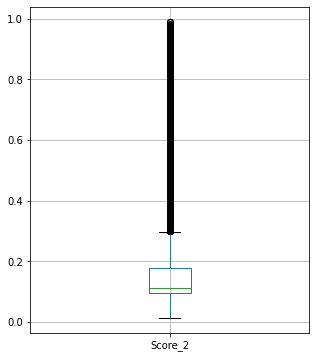

In [111]:
# Perform a box plot on Score_2
train_df.boxplot(column='Score_2',figsize=(5,6))
plt.show()

`Score_2`

1. 25% of  score2 have value between range 0 to 0.1
2. 25% of score2 have value between range 0.1 to 0.12
3. 25% of score2 have value between range 0.12 to 0.18
4. 25% of score2 have value between range 0.18 to 1

Mean Score_2 is around 0.12

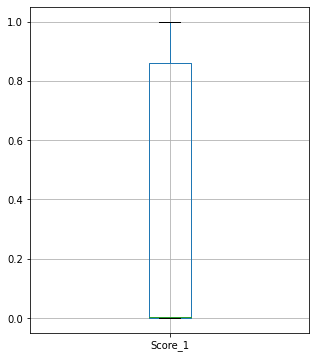

In [112]:
# Perform a box plot on Score_1
train_df.boxplot(column='Score_1',figsize=(5,6))
plt.show()

`Score_1`

1. 25% of  score1 have value between range 0 to 0.0
2. 25% of score1 have value between range 0.0 to 0.0
3. 25% of score1 have value between range 0.0 to 0.9
4. 25% of score1 have value between range 0.9 to 1

Mean score1 is around 0.0

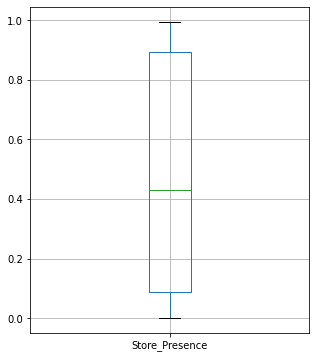

In [113]:
# Perform a box plot on Store_Presence
train_df.boxplot(column='Store_Presence',figsize=(5,6))
plt.show()

`Store_Presence`

1. 25% of  store presence have value between range 0 to 0.35
2. 25% of store presence have value between range 0.35 to 0.42
3. 25% of store presence have value between range 0.42 to 0.95
4. 25% of store presence have value between range 0.95 to 1

Mean store presence is around 0.42

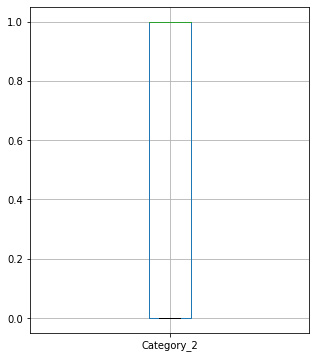

In [114]:
# Perform a box plot on Category_2
train_df.boxplot(column='Category_2',figsize=(5,6))
plt.show()

`Category_2`

1. 25% of  category2 have value between range 0 to 0.0
2. 25% of category2 have value between range 0.0 to 0.1
3. 25% of category2 have value between range 0.1 to 0.1
4. 25% of category2 have value between range 0.1 to 1

Mean Category_2 is around 0.1

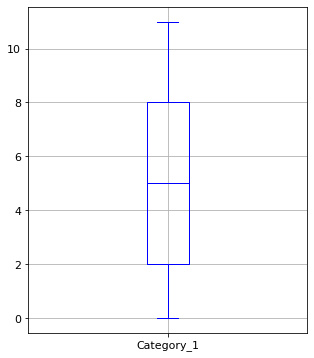

In [115]:
# Perform a box plot on Category_1
train_df.boxplot(column='Category_1',figsize=(5,6),fontsize=11,color='b')
plt.show()

`Category_1`

1. 25% of  category1 have value between range 0 to 0.2
2. 25% of category1 have value between range 0.2 to 0.5
3. 25% of category1 have value between range 0.5 to 0.8
4. 25% of category1 have value between range 0.8 to 1

Mean Category_1 is around 0.5

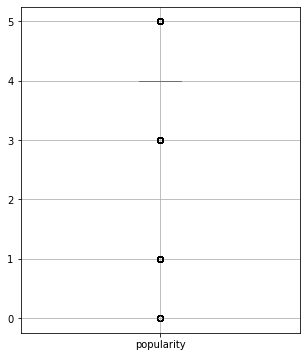

In [116]:
# Perform a box plot on popularity
train_df.boxplot(column='popularity',figsize=(5,6))
plt.show()

# Count Plot
* Kind of histogram or a bar graph for some categorical area
* It simply shows number of occurrences of an item based on a certain type of category

Store_Ratio


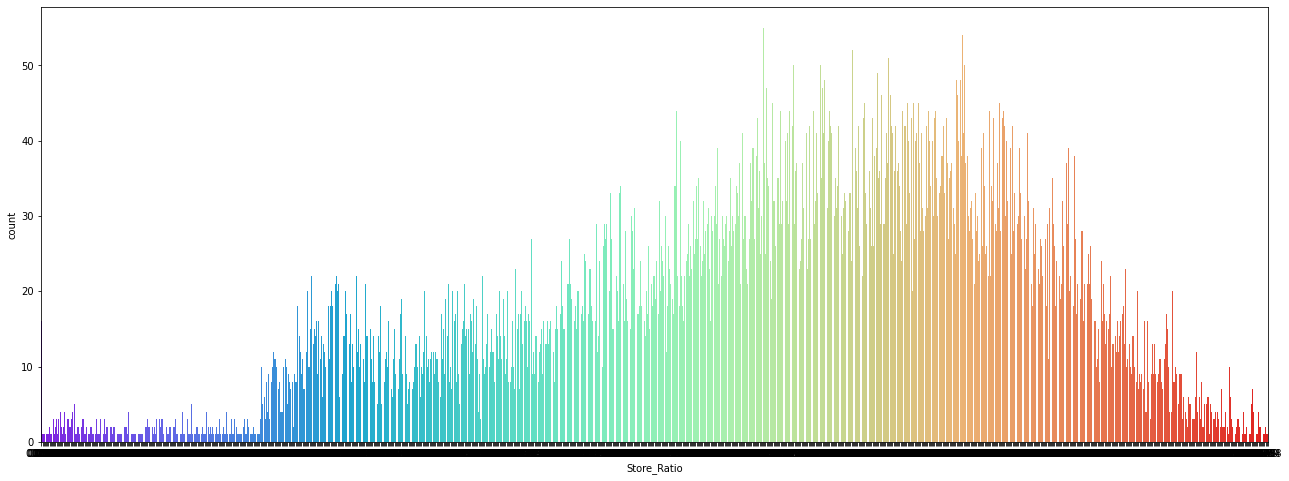

Basket_Ratio


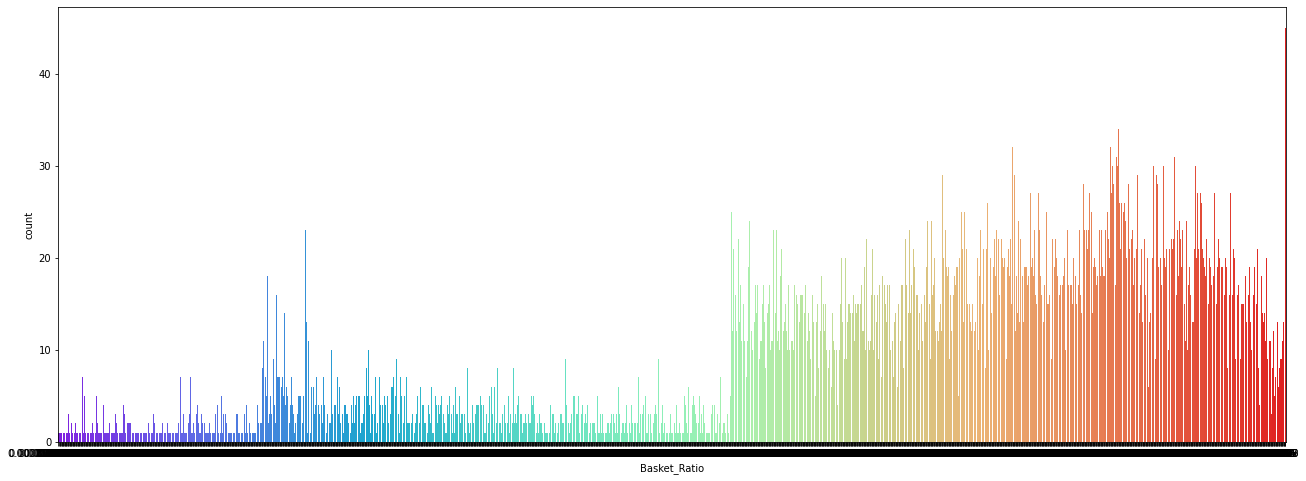

Category_1


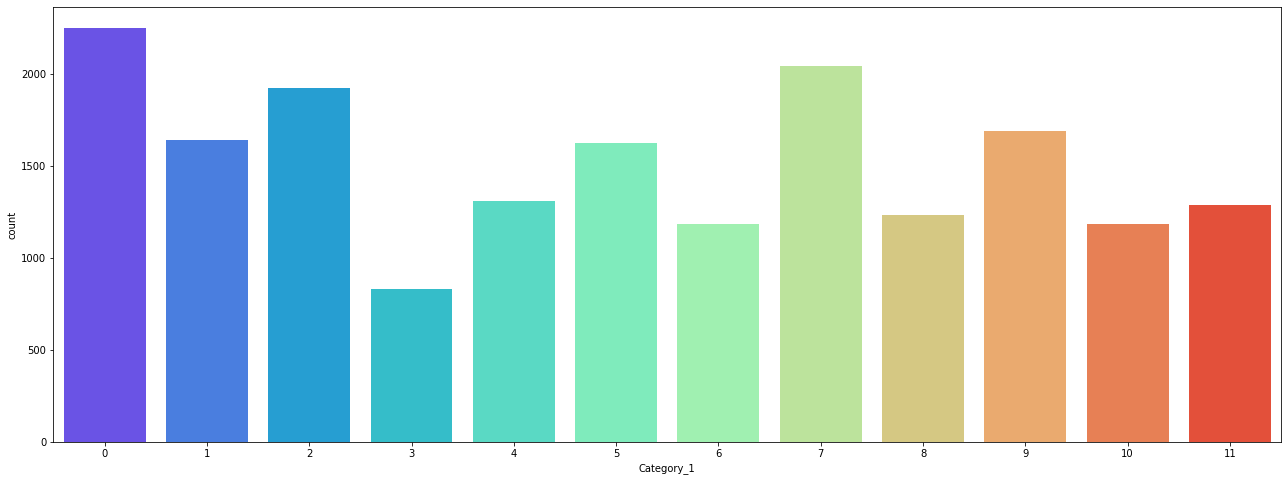

Store_Score


KeyboardInterrupt: 

In [117]:
for i in train_df.columns:
    print(i)
    plt.figure(figsize=(22,8))
    sns.countplot(train_df[i],palette='rainbow')
    plt.show()

# Point Plot
* Uses scatter plot glyphs to visualize features like point estimates and confidence intervals
* Uses scatter plot points to represent the central tendency of numeric data
* These plots make use of error bars to indicate any uncertainty around the numeric

In [ ]:
# Loop through the different columns
def point_plot(col1,col2):
    print(f'{col1}-{col2}')
    plt.figure(figsize=(22,8))
    sns.pointplot(train_df[col1],train_df[col2],palette='rainbow')
    plt.xlabel(col1,fontsize=15,color='r')
    plt.ylabel(col2,fontsize=15,color='r')
    plt.show()
    
# Loop through numerical data list and use function to scatter plot between two columns 
for col_i in train_df_columns:
    for col_j in train_df_columns:
        if col_i != col_j:
            point_plot(col_i,col_j)

# DistPlot
Distplot represents univariate distribution of data i.e. data distribution of a variable against density distribution

In [ ]:
#Perform distplot for all the columns in dataset
for col in train_df_columns:
    print(f'### {col} ####\n')

    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(22,8))
    sns.distplot(train_df[col],ax=ax[0],color='b')
    sns.distplot(train_df[col],ax=ax[2],rug=True,hist=False)
    sns.kdeplot(train_df[col],ax=ax[1],shade=True,color="r")

    plt.show()

`Observation:`

* distribution of store ratio, store presence, score3 and popularity are right skewed
* distribution of basket ratio, score2 and time are skewed left
* distribution of category 1 is multimodal
* distribution of category2 and score1 are bimodal

# Dendrogram
Dendrogram is a visual representation of compound correlation data 

Individual compounds are arranged along the bottom of dendrogram and referred to as leaf nodes <br>

Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node

In [ ]:
import scipy
from scipy import stats
from scipy.cluster import hierarchy

In [ ]:
# droping the NaN values if any
train_data_no_nan = train_df.dropna()

# Plot a Dendrogram on the columns of the dataset
corr = np.round(scipy.stats.spearmanr(train_data_no_nan).correlation,4)
corr_condensed = hierarchy.distance.squareform(1-corr) # non -ve val and compresed

plt.figure(figsize=(14,9))
hierarchy.dendrogram(hierarchy.linkage(corr_condensed,method='average'),
                     labels=train_data_no_nan.columns,orientation='left',leaf_font_size=15)
plt.show()

`Strongly correlated variables`

* score3 and store ratio
* store score and basket ratio
* score1 and store presence

# Boxenplot
* Otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000)
* Very similar to box plot, except for the fact that it plots different quartile values
* By plotting different quartile values, we are able to understand the shape of the distribution particularly in head end and tail end

[Why boxen not box](https://stackoverflow.com/questions/52403381/how-boxen-plot-is-different-from-box-plot)

In [ ]:
# Loop through the different columns
def boxen_plot(col1,col2):
    print(f'{col1}-{col2}')
    plt.figure(figsize=(22,8))
    sns.boxenplot(train_df[col1],train_df[col2],palette='rainbow')
    plt.xlabel(col1,fontsize=15,color='r')
    plt.ylabel(col2,fontsize=15,color='r')
    plt.show()
    
# Loop through numerical data list and use function to scatter plot between two columns 
for col_i in train_df_columns:
    for col_j in train_df_columns:
        if col_i != col_j:
            boxen_plot(col_i,col_j)

# Violin Plot
* Used in plotting of numeric data
* Similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator

It has:

1. Median (a white dot on the violin plot)
2. Interquartile range (the black bar in the center of violin)

3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

In [ ]:
# Loop through the different columns
def violin_plot(col1,col2):
    print(f'{col1}-{col2}')
    plt.figure(figsize=(22,8))
    sns.violinplot(train_df[col1],train_df[col2],palette='rainbow')
    plt.xlabel(col1,fontsize=15,color='r')
    plt.ylabel(col2,fontsize=15,color='r')
    plt.show()
    
# Loop through numerical data list and use function to scatter plot between two columns 
for col_i in train_df_columns:
    for col_j in train_df_columns:
        if col_i != col_j:
            violin_plot(col_i,col_j)

# I will continue rest of this part in => [second notebook](https://www.kaggle.com/mukeshmanral/2-diff-model-merchandise-popularity/edit)

># 1- Preprocessing
># 2- Scaling
># 3- Modelling
># 4- Comparing n models